The following evaluations were inspired from the work of authors of Variational Inequaltiy : https://arxiv.org/abs/1802.10551

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

import pylab
pylab.rcParams['figure.figsize'] = (10, 8)
plt.rcParams.update({'font.size': 22})
plt.rcParams['text.latex.preamble'] = [r"\usepackage{lmodern}"]
params = {'text.usetex': True,
         'font.size': 12,
         }
plt.rcParams.update(params)

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120), (44, 160, 44), (152, 223, 138),
             (214, 39, 40), (255, 152, 150), (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229)] 
tableau20 = [ (c[0]/255., c[1]/255., c[2]/255.) for c in tableau20]

# Bilinear Objective

Example of bilinear objectives is WGAN with a discriminator $D(x) = \phi x$, between $x_{true} \sim \mathcal{N}(0,1)$ and $x_{gen} = z + \theta$ with $z \sim \mathcal{N}(0,1)$ then: $$\min_\theta \max_\phi \theta\phi$$
Note: 
- Actually works for any distribution, as long as the discriminator and generator are linear.
- Draw a line between both distribution at the middle of the means, and shift the distribution until the mean is the same.

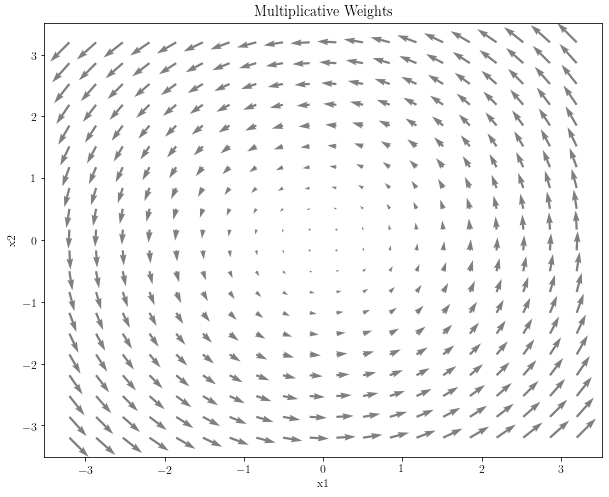

In [ ]:
x_0, y_0 = 2., 0.5
OUTPUT_PATH = 'figure'
N_ITER = 1000
markevery=10
X, Y = np.meshgrid(np.linspace(-3.2, 3.2, 20), np.linspace(-3.2, 3.2, 20))
F_x = -Y
F_y = X

fig1 = plt.figure(1)
ax1 = fig1.gca()
ax1.set_title('Multiplicative Weights')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
Q = ax1.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.004)


def grad(x, y):
    return -y, x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


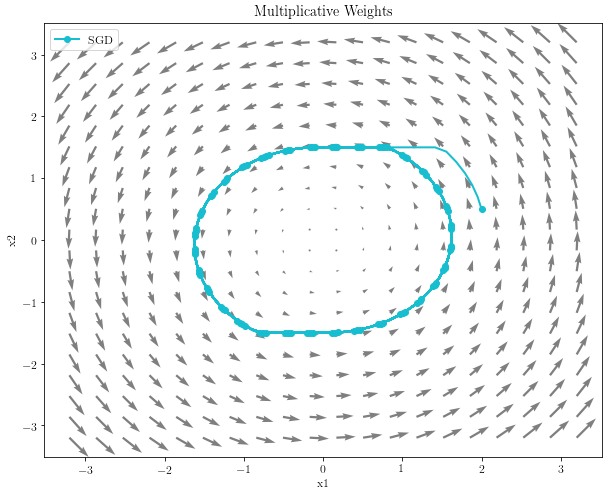

In [ ]:
# Alternating Gradient Descent
x, y = x_0, y_0
LR = 0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    x_ = x + LR*g_x
    y_ = y + LR*g_y
    x, y = x_, np.clip(y_, -1.5, 1.5)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

sim_sgd = ax1.plot(x_hist, y_hist, c=tableau20[0],alpha=1,linewidth=2, color='tab:cyan', label='SGD',markevery=markevery, marker='o')
ax1.legend(loc='upper left', fancybox=True)

fig1

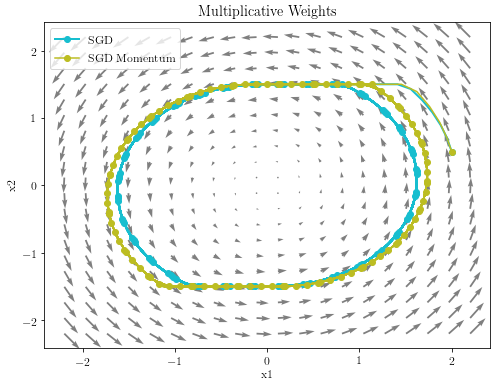

In [ ]:
# Gradient Descent with momentum
x, y = x_0, y_0
v_x, v_y = 0., 0.
LR = 0.1
MOMENTUM = -0.1
x_hist, y_hist = [x_0], [y_0]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    v_x = MOMENTUM*v_x + LR*g_x
    v_y = MOMENTUM*v_y + LR*g_y
    x_ = x + v_x
    y_ = y + v_y
    x, y = x_, np.clip(y_, -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

#sgd_negative_momentum = ax1.plot(x_hist, y_hist, marker='o', c=tableau20[1], markevery=markevery)
#ax2.plot(loss_hist, c=tableau20[1], label='SGD with momentum $\gamma=0.1$')
#ax3.plot(grad_norm, c=tableau20[1], label='SGD with momentum $\gamma=0.1$')
fig1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


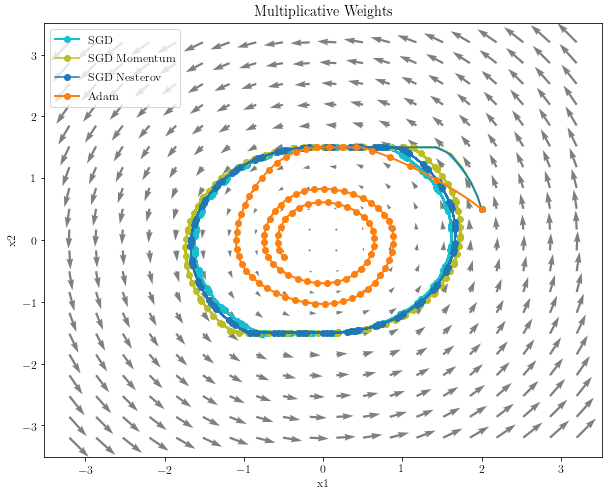

In [ ]:
# Adam
x, y = x_0, y_0
v_x, v_y = 0., 0.
m_x, m_y = 0., 0.
LR = 0.01
BETA_1 = 0.
BETA_2 = 0.99
EPSILON = 1e-8
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    m_x = BETA_1*m_x + (1-BETA_1)*g_x
    m_y = BETA_1*m_y + (1-BETA_1)*g_y 
    v_x = BETA_2*v_x + (1-BETA_2)*g_x**2
    v_y = BETA_2*v_y + (1-BETA_2)*g_y**2
    m_hat_x = m_x/(1-BETA_1**(i+1))
    m_hat_y = m_y/(1-BETA_1**(i+1))
    v_hat_x = v_x#/(1-BETA_2**(i+1))
    v_hat_y = v_y#/(1-BETA_2**(i+1))
    
    x_ = x + LR*m_hat_x/(np.sqrt(v_hat_x)+EPSILON)
    y_ = y + LR*m_hat_y/(np.sqrt(v_hat_y)+EPSILON)
    x, y = x_, np.clip(y_, -1.5, 1.5)
    #x, y = x_, y_
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

adam = ax1.plot(x_hist, y_hist, c=tableau20[6], alpha=1,linewidth=2, label='Adam', color="tab:orange", markevery=markevery, marker='o')
ax1.legend(loc='upper left', fancybox=True)
fig1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


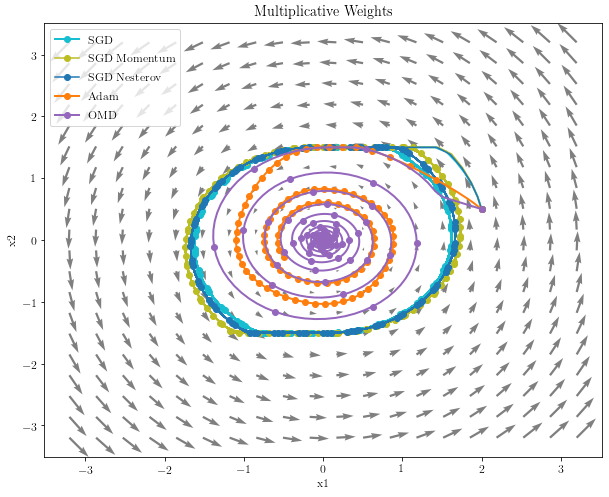

In [ ]:
# Optimistic Mirror Descent

x, y = x_0, y_0
LR = 0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
x1, x2, y1, y2 = 0,0,0,0
for i in range(N_ITER):
    
    if(i==0):
        x2 = x
        y2 = y

        y = np.clip(y + LR*x, -1.5, 1.5)
        x = np.clip(x - LR*y , -1.5, 1.5)
    
    elif(i==1):
        x1 = x
        y1 = y

        y = np.clip(y2 + LR*x2, -1.5, 1.5)
        x = np.clip(x2 - LR*y2 , -1.5, 1.5)

    else:
        y = np.clip(y1 + 2*LR*x1 - LR*x2, -1.5, 1.5)
        x = np.clip(x1 - 2*LR*y1 + LR*y2, -1.5, 1.5)

        x2 = x1
        x1 = x

        y2 = y1
        y1 = y
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2+y**2)
    
omd = ax1.plot(x_hist, y_hist, c=tableau20[3], alpha=1,linewidth=2, label='OMD',markevery=markevery, marker='o', color="tab:purple")
ax1.legend(loc='upper left', fancybox=True)
fig1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


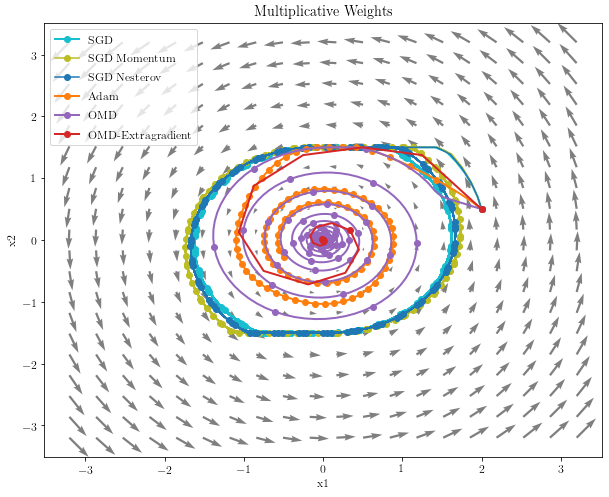

In [ ]:
# New Extragradient
x, y = x_0, y_0
x_, y_ = x, y
LR = .5
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    
    x__ = x_
    x_ = x + LR*(-y_)
    y_ = np.clip(y + LR*(x__), -1.5, 1.5)
    
    x = x + LR*(-y_)
    y = np.clip(y + LR*(x_), -1.5, 1.5)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2 + y**2)

new_extra_sgd = ax1.plot(x_hist, y_hist, c=tableau20[10], alpha=1,linewidth=2, label='OMD-Extragradient',markevery=markevery, marker='o', color="tab:red")
ax1.legend(loc='upper left', fancybox=True)
fig1